# **E-Commerce Behavior Data**
# Data Mining Project By Suwarti

## **Business Understanding**

#### * E-Commerce is a business model that lets firms and individuals buy and sell things over the internet.

#### * This case has some business question using the data:
#### - What is the best product to sell in the specific time of the day?
#### - What is the best Event to predict that User most likely to buy a product?
#### - How is the behaviour of our repeat user vs new user?


## **Data Understanding**

#### * Behavior data for October 2019 from a large multi-category online store. Each row in the file
#### represents an event. All events are related to products and users. Each event is like many-to
#### many relation between products and users.


#### * Source Data: https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store


#### * Data Dictionary:

#### - event_time: Time when event happened at (in UTC).

#### - event_type: Only one kind of event: purchase.

#### - product_id: ID of a product

#### - category_id: Product's category ID

#### - category_code: Product's category taxonomy (code name) if it was possible to make it. Usually 
####   present for meaningful categories and skipped for different kinds of accessories.

#### - brand: Downcased string of brand name. Can be missed.

#### - price: Float price of a product. Present.

#### - user_id: Permanent user ID.

#### - user_session: Temporary user's session ID. Same for each user's session. Is changed every
#### time user come back to online store from a long pause.


## **Data preparation**

### **Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dtime
from datetime import date

### **Import Dataset**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv
/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv


In [ ]:
df = pd.read_csv("/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv")

### **Check Dataset**

In [ ]:
df.info()

## **Data Cleansing**

In [5]:
df['event_time'] = pd.to_datetime(df['event_time'])

## **Exploratory Data Analysis**

#### **the best product to sell in the specific time of the day**

In [6]:
df["event_time"].dt.day_name().value_counts()

Tuesday      6801885
Wednesday    6652532
Thursday     6380367
Sunday       5855995
Friday       5829660
Saturday     5606796
Monday       5321529
Name: event_time, dtype: int64

In [7]:
df["event_type"].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [8]:
df_not_view = df[df["event_type"] != "view"]

In [9]:
df_not_view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669365 entries, 162 to 42448657
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   event_time     1669365 non-null  datetime64[ns, UTC]
 1   event_type     1669365 non-null  object             
 2   product_id     1669365 non-null  int64              
 3   category_id    1669365 non-null  int64              
 4   category_code  1390214 non-null  object             
 5   brand          1592254 non-null  object             
 6   price          1669365 non-null  float64            
 7   user_id        1669365 non-null  int64              
 8   user_session   1669363 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 127.4+ MB


In [10]:
df_not_view["event_time"].dt.day_name().value_counts()

Tuesday      253566
Wednesday    253541
Friday       245282
Thursday     244883
Sunday       232002
Saturday     226606
Monday       213485
Name: event_time, dtype: int64

In [11]:
df_purchased = df[df["event_type"] == "purchase"]

In [12]:
df_purchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742849 entries, 162 to 42448657
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     742849 non-null  datetime64[ns, UTC]
 1   event_type     742849 non-null  object             
 2   product_id     742849 non-null  int64              
 3   category_id    742849 non-null  int64              
 4   category_code  569424 non-null  object             
 5   brand          684544 non-null  object             
 6   price          742849 non-null  float64            
 7   user_id        742849 non-null  int64              
 8   user_session   742849 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 56.7+ MB


In [13]:
df_purchased["event_time"].dt.day_name().value_counts()

Wednesday    119159
Tuesday      114510
Thursday     113664
Friday       103044
Sunday       100233
Saturday      96177
Monday        96062
Name: event_time, dtype: int64

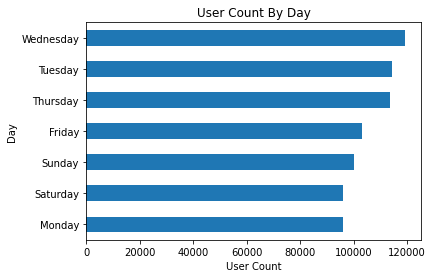

In [14]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Day')
ax.set_title('User Count By Day')


df_purchased["event_time"].dt.day_name().value_counts().sort_values().plot(kind='barh');

#### Most consumers shop at e-commerce on Wednesday. Actually, consumers have seen the product since Sunday. After Sunday consumers are still considering whether to buy or not. Beside that consumers are still comparing one product to another. The final decision to buy is mostly made on Wednesday. The e-commerce business team can provide a campaign to convince customers. The campaign can be intensified on Wednesday.


#### **the best Event to predict that User most likely to buy a product**

In [15]:
df_purchased[df_purchased["event_time"].dt.day_name()=="Wednesday"]["brand"].value_counts().head(10)

samsung     28216
apple       23469
xiaomi       9042
huawei       3745
lucente      2012
cordiant     1612
oppo         1594
lg           1287
acer         1119
artel        1046
Name: brand, dtype: int64

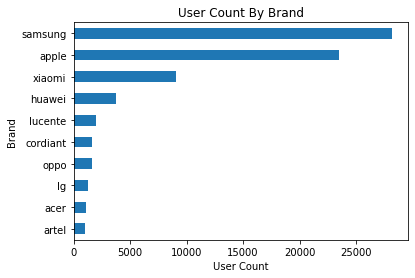

In [16]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Brand')
ax.set_title('User Count By Brand')

df_purchased[df_purchased["event_time"].dt.day_name()=="Wednesday"]["brand"].value_counts().head(10).sort_values().plot(kind='barh');

#### Many consumers choose brand Samsung because it already has a strong and positive image for the smartphone segment. Samsung also has a simple and trend-following model. In addition, Samsung is diligent in innovating and releasing the latest technology. Seeing Samsung's very large consumer market, the e-commerce business team can make bundling package promos to expand the market.


#### **the behaviour of our repeat user vs new user**

##### disclaimer:
* I defined user that customer who purchase the product and cart the product (written as "not_view")
* new customer: not_view_count is just one
* repeat customer: not_view_count is more than one

In [17]:
df["user_id"].value_counts().values

array([7436, 4013, 2912, ...,    1,    1,    1])

In [18]:
import pandasql

In [19]:
user_count = pandasql.sqldf("""

select user_id, count(*) as counts
from df_not_view
group by 1 
order by 2 desc

""")

#### #new user

In [20]:
df_not_view_count = pd.merge(df_not_view, user_count, on ="user_id")

In [21]:
user_repeat = df_not_view_count[df_not_view_count["counts"] >1]
user_new = df_not_view_count[df_not_view_count["counts"] == 1]

In [22]:
user_new["event_type"].value_counts()

purchase    106775
cart         87605
Name: event_type, dtype: int64

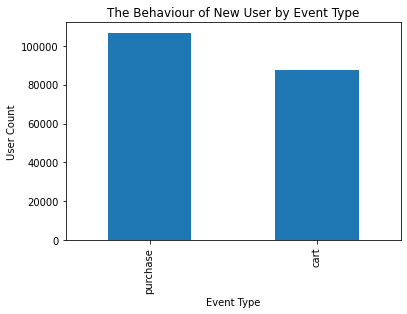

In [23]:
fig, ax = plt.subplots()

ax.set_xlabel('Event Type')
ax.set_ylabel('User Count')
ax.set_title('The Behaviour of New User by Event Type')


user_new["event_type"].value_counts().plot(kind='bar');

In [24]:
user_new["category_code"].value_counts().head()

electronics.smartphone         70249
electronics.audio.headphone     8527
electronics.video.tv            6257
appliances.kitchen.washer       5133
electronics.clocks              4780
Name: category_code, dtype: int64

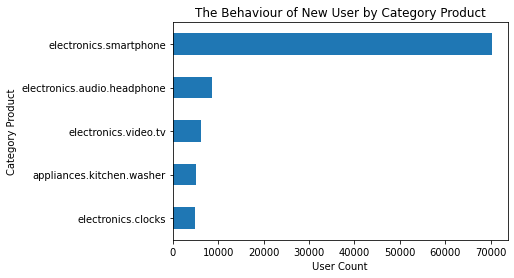

In [25]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Category Product')
ax.set_title('The Behaviour of New User by Category Product')

user_new["category_code"].value_counts().head().sort_values().plot(kind='barh');

#### Most new users buy smartphone electronics products. The e-commerce business team can make promo of this product category to attract more new market users.
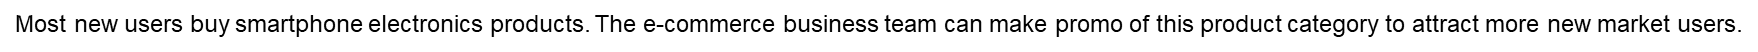
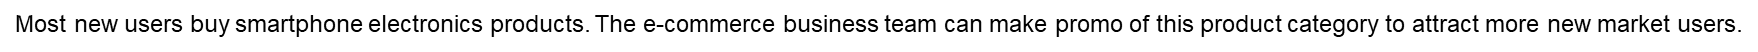
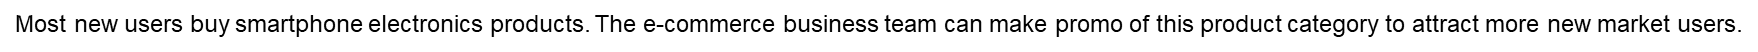
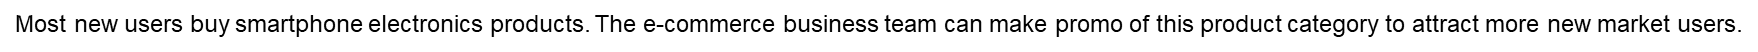

In [26]:
user_new["price"].value_counts().head()

131.53    1112
130.99     902
257.15     809
131.64     770
40.93      687
Name: price, dtype: int64

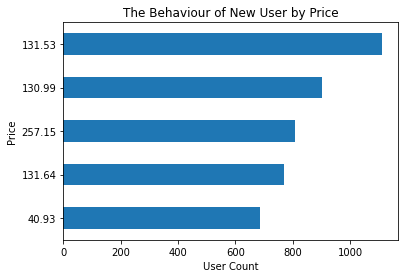

In [27]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Price')
ax.set_title('The Behaviour of New User by Price')

user_new["price"].value_counts().head().sort_values().plot(kind='barh');

#### #repeat user

In [28]:
user_repeat.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'counts'],
      dtype='object')

In [29]:
user_repeat["event_type"].value_counts()

cart        838911
purchase    636074
Name: event_type, dtype: int64

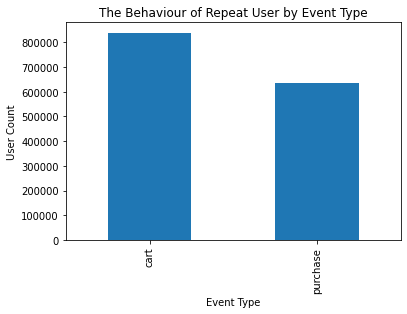

In [30]:
fig, ax = plt.subplots()

ax.set_xlabel('Event Type')
ax.set_ylabel('User Count')
ax.set_title('The Behaviour of Repeat User by Event Type')


user_repeat["event_type"].value_counts().plot(kind='bar');

In [31]:
user_repeat["category_code"].value_counts().head()

electronics.smartphone         817534
electronics.audio.headphone     73119
electronics.video.tv            51532
electronics.clocks              33470
appliances.kitchen.washer       32992
Name: category_code, dtype: int64

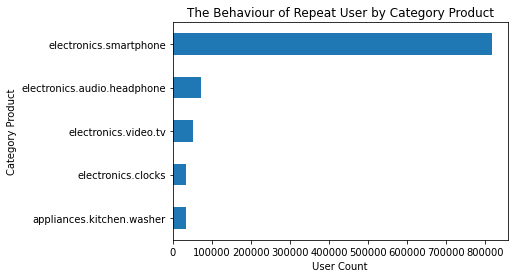

In [32]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Category Product')
ax.set_title('The Behaviour of Repeat User by Category Product')

user_repeat["category_code"].value_counts().head().sort_values().plot(kind='barh');

#### Most repeat users buy smartphone electronics products. Meanwhile product electronics audio headphones have a very large gap. The e-commerce business team can make product bundling between electronics smartphone products and electronics audio headphones to increase profits from product categories that are still low in orders.
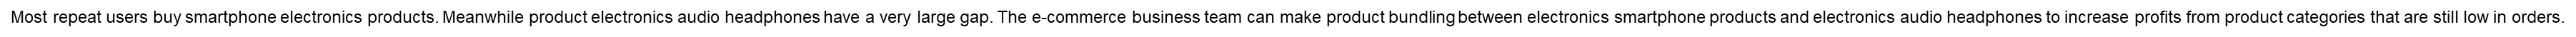
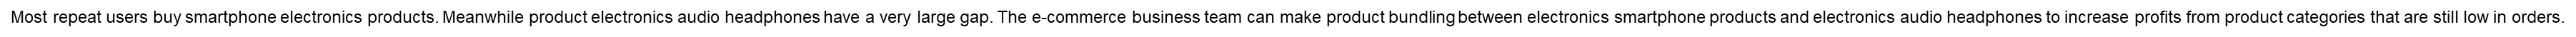
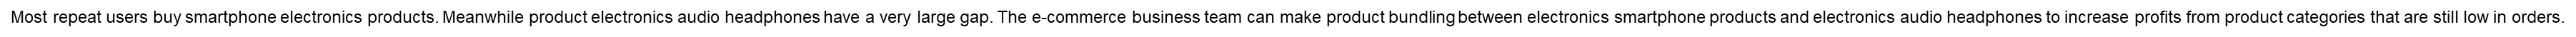
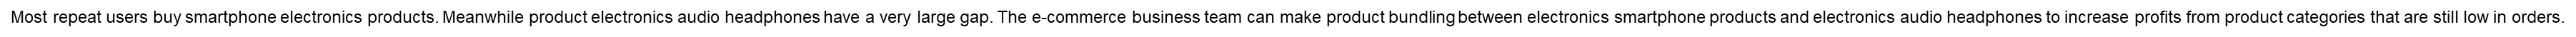

In [33]:
user_repeat["price"].value_counts().head()

131.53    16171
131.64    12404
130.99    12398
131.02     8616
358.57     7237
Name: price, dtype: int64

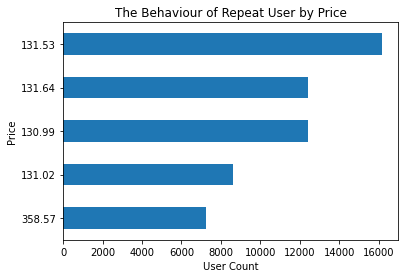

In [34]:
fig, ax = plt.subplots()

ax.set_xlabel('User Count')
ax.set_ylabel('Price')
ax.set_title('The Behaviour of Repeat User by Price')

user_repeat["price"].value_counts().head().sort_values().plot(kind='barh');